In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read tables

In [3]:
ev_co = pd.read_csv("ev_co2_final.csv")

In [4]:
ev_co.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
print(f"The present table contains information on Electric Vehicle (EV) sales and CO2 emissions \n across {ev_co["country"].nunique()} countries and {ev_co["year"].nunique()} years, including: \n Countries: {ev_co["country"].unique()} \n Years: {ev_co["year"].unique()}")

The present table contains information on Electric Vehicle (EV) sales and CO2 emissions 
 across 46 countries and 12 years, including: 
 Countries: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa'
 'Spain' 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates'
 'United Kingdom'] 
 Years: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2010]


In [6]:
ev_co

,country,year,ev_sales,co2_metric_tons
0,Australia,2011,98,403.83
1,Australia,2012,550,406.15
2,Australia,2013,880,397.89
3,Australia,2014,3200,393.95
4,Australia,2015,5360,401.79
...,...,...,...,...
435,United Kingdom,2017,178070,387.37
436,United Kingdom,2018,248109,379.73
437,United Kingdom,2019,326242,364.75
438,United Kingdom,2020,588299,326.26


In [7]:
# Top 10 most polluting countries
top10co = pd.read_csv("querytocsv/top10_co2.csv")
top10co = ev_co[ev_co["country"].isin(top10co["country"])]
top10co = top10co.reset_index()
top10co

,index,country,year,ev_sales,co2_metric_tons
0,0,Australia,2011,98,403.83
1,1,Australia,2012,550,406.15
2,2,Australia,2013,880,397.89
3,3,Australia,2014,3200,393.95
4,4,Australia,2015,5360,401.79
...,...,...,...,...,...
113,435,United Kingdom,2017,178070,387.37
114,436,United Kingdom,2018,248109,379.73
115,437,United Kingdom,2019,326242,364.75
116,438,United Kingdom,2020,588299,326.26


In [8]:
# Top 10 EV buyer countries
top10ev = pd.read_csv("querytocsv/top10_ev_buyers.csv")
top10ev = ev_co[ev_co["country"].isin(top10ev["country"])]
top10ev = top10ev.reset_index()
top10ev

,index,country,year,ev_sales,co2_metric_tons
0,54,Canada,2010,5,556.56
1,55,Canada,2011,1075,567.05
2,56,Canada,2012,4355,568.22
3,57,Canada,2013,8605,572.61
4,58,Canada,2014,15805,569.84
...,...,...,...,...,...
115,435,United Kingdom,2017,178070,387.37
116,436,United Kingdom,2018,248109,379.73
117,437,United Kingdom,2019,326242,364.75
118,438,United Kingdom,2020,588299,326.26


## Summary Statistics

In [9]:
ev_co[["ev_sales", "co2_metric_tons"]].describe().astype(int)

,ev_sales,co2_metric_tons
count,440,440
mean,141295,673
std,696246,1833
min,3,0
25%,491,40
50%,4119,83
75%,39460,417
max,11073857,11472


In [10]:
ev_co.describe().astype(int)

,year,ev_sales,co2_metric_tons
count,440,440,440
mean,2016,141295,673
std,3,696246,1833
min,2010,3,0
25%,2014,491,40
50%,2017,4119,83
75%,2019,39460,417
max,2021,11073857,11472


In [10]:
ev_co[ev_co["ev_sales"] == ev_co["ev_sales"].max()]

,country,year,ev_sales,co2_metric_tons
88,China,2021,11073857,11472.37


## Visualizations

In [11]:
ev_co_matrix = ev_co[["ev_sales", "co2_metric_tons"]].corr()
ev_co_matrix

,ev_sales,co2_metric_tons
ev_sales,1.000000,0.590997
co2_metric_tons,0.590997,1.000000


<Axes: >

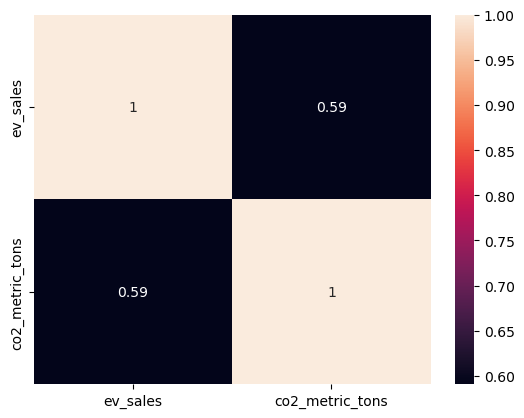

In [12]:
sns.heatmap(ev_co_matrix, annot=True)

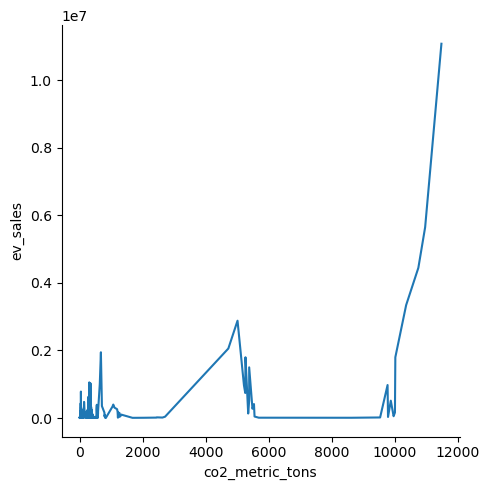

In [13]:
sns.relplot(data=ev_co, x="co2_metric_tons", y="ev_sales", kind="line")

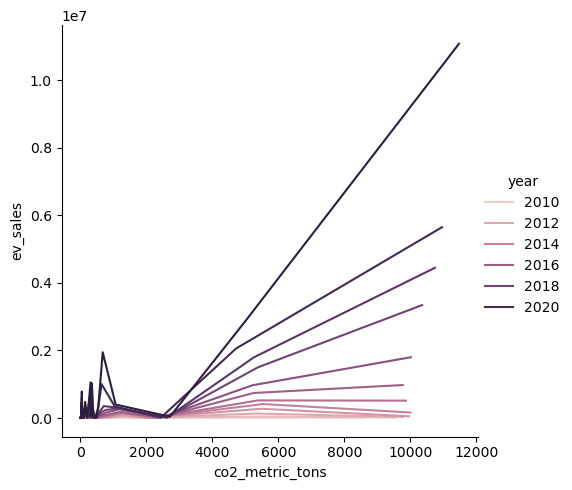

In [14]:
sns.relplot(
    data=ev_co, kind="line",
    x="co2_metric_tons", y="ev_sales", hue="year",
)

Text(0.5, 1.0, 'Top 10 EV buyer countries by EV sales')

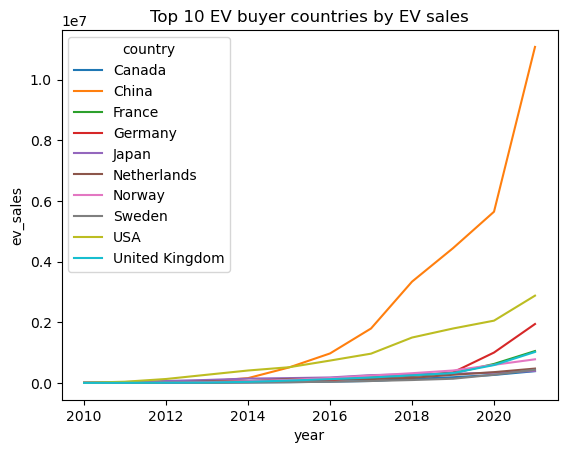

In [15]:
sns.lineplot(data=top10ev, x='year', y='ev_sales', hue='country')
plt.title("Top 10 EV buyer countries by EV sales")

Text(0.5, 1.0, 'Top 10 EV buyer countries by CO2 emissions')

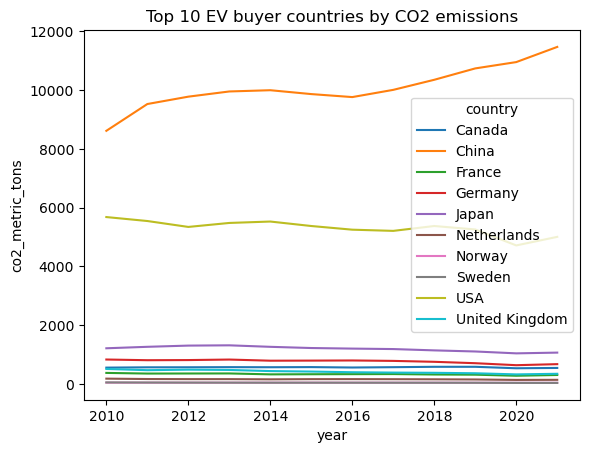

In [16]:
sns.lineplot(data=top10ev, x='year', y='co2_metric_tons', hue='country')
plt.title("Top 10 EV buyer countries by CO2 emissions")

Text(0.5, 1.0, 'Top 10 most polluting countries by EV sales')

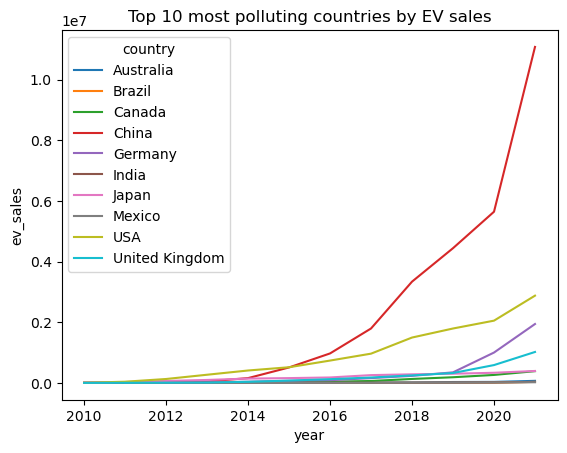

In [17]:
sns.lineplot(data=top10co, x='year', y='ev_sales', hue='country')
plt.title("Top 10 most polluting countries by EV sales")

Text(0.5, 1.0, 'Top 10 most polluting countries by CO2 emissions')

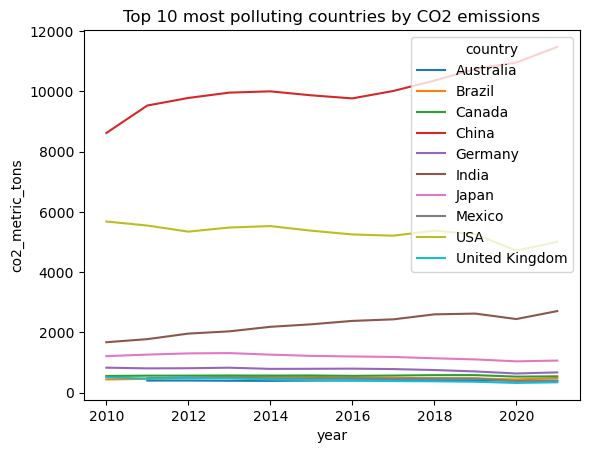

In [18]:
sns.lineplot(data=top10co, x='year', y='co2_metric_tons', hue='country')
plt.title("Top 10 most polluting countries by CO2 emissions")

<Axes: xlabel='co2_metric_tons', ylabel='ev_sales'>

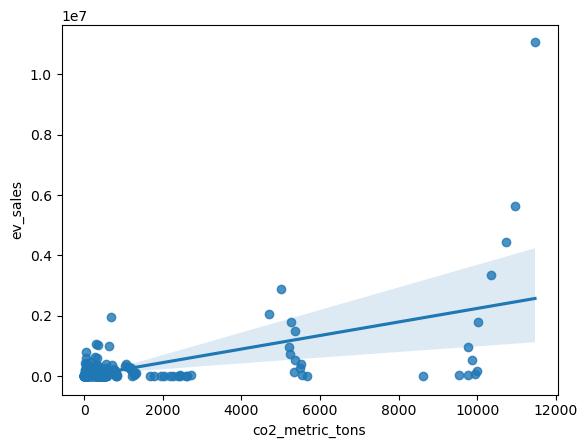

In [19]:
sns.regplot(x="co2_metric_tons", y="ev_sales", data=ev_co)

### Yearly average EV sales

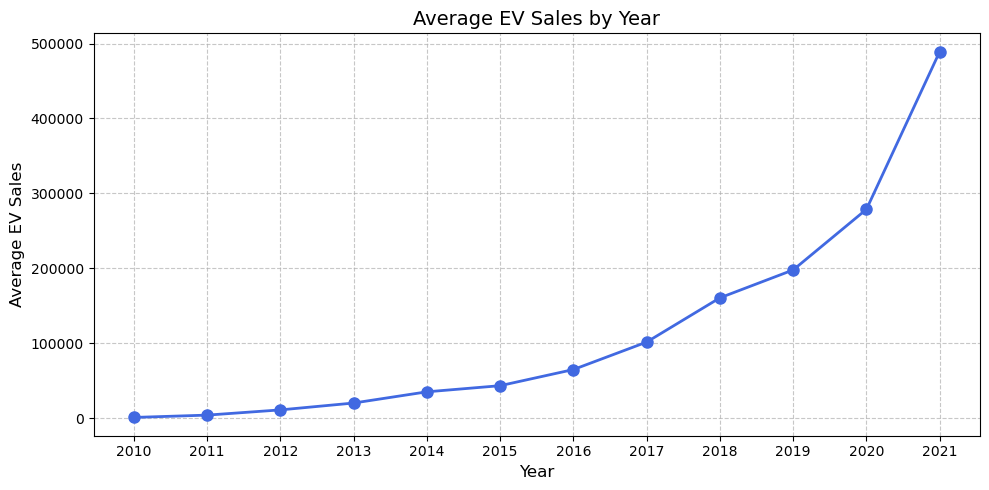

In [11]:
yearly_avg = ev_co.groupby('year')['ev_sales'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['year'], yearly_avg['ev_sales'],
         marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8)
plt.title('Average EV Sales by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average EV Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_avg['year'])  # Ensure all years are shown
plt.tight_layout()
plt.show()

### Yearly average CO2 emissions

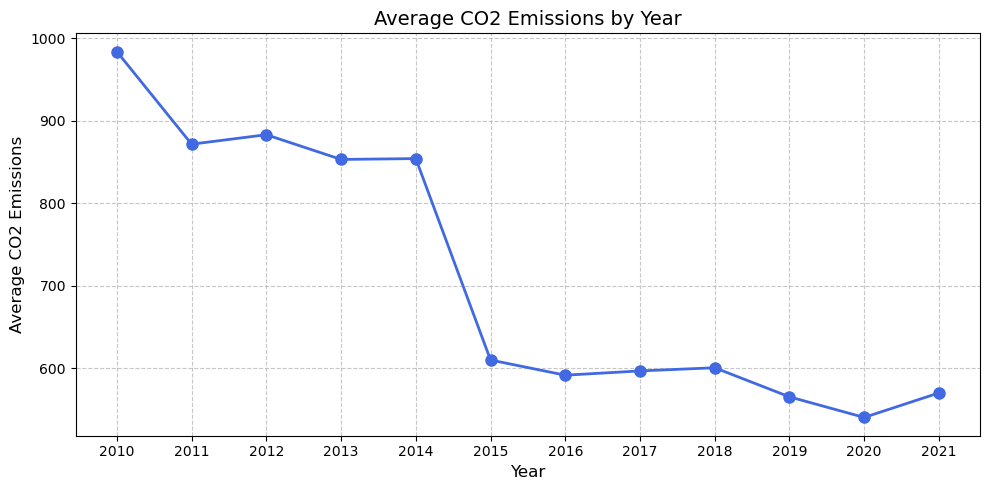

In [13]:
yearly_avg_CO2 = ev_co.groupby('year')['co2_metric_tons'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['year'], yearly_avg_CO2['co2_metric_tons'],
         marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8)
plt.title('Average CO2 Emissions by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average CO2 Emissions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_avg['year'])  # Ensure all years are shown
plt.tight_layout()
plt.show()

### Correlation

                 co2_metric_tons  ev_sales
co2_metric_tons         1.000000  0.590997
ev_sales                0.590997  1.000000


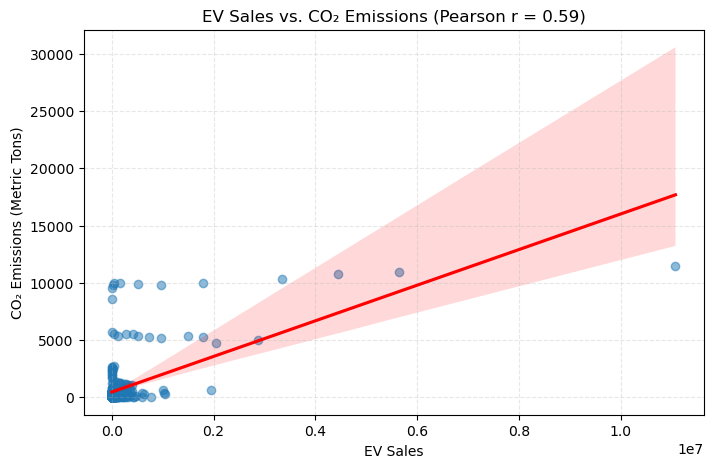

In [14]:
overall_corr = ev_co[['co2_metric_tons', 'ev_sales']].corr(method='pearson')
print(overall_corr)
plt.figure(figsize=(8, 5))
sns.regplot(data=ev_co, x='ev_sales', y='co2_metric_tons',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("EV Sales vs. CO₂ Emissions (Pearson r = {:.2f})".format(overall_corr.iloc[0, 1]))
plt.xlabel("EV Sales")
plt.ylabel("CO₂ Emissions (Metric Tons)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()